# TP 4 Theorie et Traitement de l'Information
## MGSI 4 - JAAFAR Leila

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

## exercice 1

In [204]:
#1 chargement du dataset salary data
salary = pd.read_excel(r"C:\Users\leila\Downloads\datasets\Salary_Data.xlsx")

In [206]:
#2 affichage des lignes
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [208]:
#3 s'assurer de la presence des valeurs manquantes
salary.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

*on supprime les lignes manquantes*

In [211]:
# suppression des lines manquantes
salary.dropna(inplace=True)

In [213]:
salary.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

*en supprimant les lines nulles, on ajoute inplace=True afin d'avoir les changements dans le meme dataset. <br> En appliquant la meme commande on voir qu'on a plus de lines nulles.*

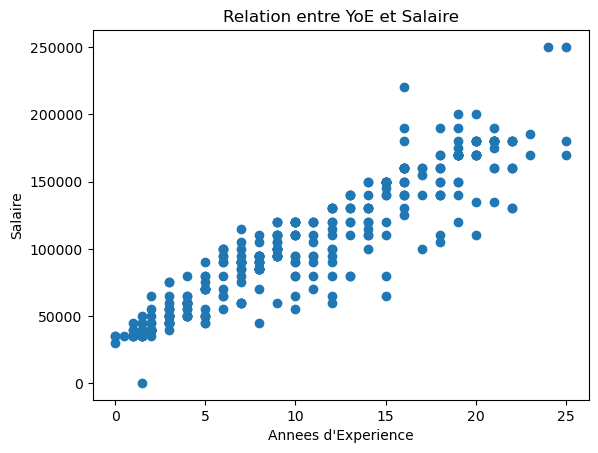

In [216]:
# graphique pour nombre d'experience et salaire
plt.scatter(salary['Years of Experience'], salary['Salary'])
plt.title('Relation entre YoE et Salaire')
plt.xlabel('Annees d\'Experience')
plt.ylabel('Salaire')
plt.show()

In [218]:
#5 definition des features et target
X = pd.DataFrame(salary['Years of Experience'])
y = salary['Salary']

In [220]:
#6 train test et test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
# affichage des tailles
print(f'{X_train.shape}, {X_test.shape}, {y_test.shape}, {y_train.shape}')

(298, 1), (75, 1), (75,), (298,)


In [224]:
#7 creation de modele de regression lineaire
model = LinearRegression()

In [226]:
#8 entrainement du modele
model.fit(X_train, y_train)

LinearRegression()

*afin d'eviter le probleme de series; (le fit accepte un dataframe) on transforme salary['Years of Experience'] en un dataframe par pd.DataFrame*

In [229]:
#9 affichage du coefficient de regression
coefficient_s = model.coef_
intercept_s = model.intercept_
print(model.coef_)
print(model.intercept_)

[6822.59017499]
31521.077620206008


In [231]:
#10 prediction sur X_test
y_pred = model.predict(X_test)

*avant de faire la prediction avec de nouvelles data, on fait premierement la prediction avec X_test et on peut ensuite calculer l'accuracy*

In [234]:
#11 effectuer des predictions
new_data = [5, 3, 2.5, 7, 10]
prediction = model.predict(np.array(new_data).reshape(-1,1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [236]:
prediction

array([65634.02849515, 51988.84814517, 48577.55305768, 79279.20884513,
       99746.97937009])

In [238]:
#12 evaluation du modele
# r squared
r2_salary = r2_score(y_test, y_pred)
# mse
mse_salary = mean_squared_error(y_test, y_pred)

print(f'r2: {r2_salary*100}% \n mse: {mse_salary}')

r2: 89.91338517367767% 
 mse: 241834883.8999349


*on a un r^2 de 0.89 ce qui signifie que 89% de la variance des donnees peut etre expliquee.*

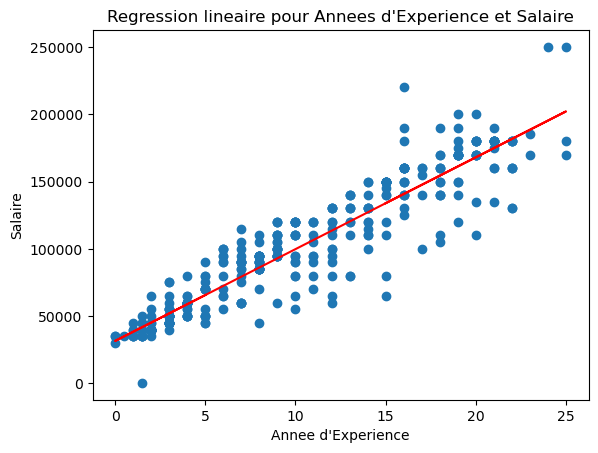

In [241]:
#13 affichage des donnees reelles et droite de regression
regression_salaire = coefficient_s * X + intercept_s
# plotting
plt.scatter(X, y)
plt.plot(X, regression_salaire, color = 'red')
plt.title('Regression lineaire pour Annees d\'Experience et Salaire')
plt.xlabel('Annee d\'Experience')
plt.ylabel('Salaire')
plt.show()

*donc c'est facile de constater qu'avec plus d'annees d'experience, on a un salaire plus elevee.<br>
afin d'avoir la ligne de regression, on plot X (annee d'experience) avec la fonction, on peut s'assurer de ca par l'exemple: pour X = 5 ans, y = 5*6822.59 + 31521 = 65633.95 et en projetant, on peut voir que c'est correcte.*

## exercice 2

In [245]:
#1 chargement du dataset
student = pd.read_excel(r"C:\Users\leila\Downloads\datasets\Student_Performance.xlsx")
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [247]:
#2 nettoyage des donnees
# verification des valeurs manquantes
student.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

*on n'a pas de valeurs manquantes donc c'est pas la peine de prendre d'action.*

In [252]:
#4 remplacer oui/non par 1 et 0
student['Extracurricular Activities'] = student['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [254]:
#3 division en training et test sets
X = student.drop(columns = ['Performance Index'])
y = student['Performance Index']

*on a les variables dependantes sont toutes les colonnes sauf la variable dependante y = Performance Index. <br>
Il est important de remplacer les donnes de Extracurricular Activities et ensuite diviser en training et test sets*

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
#5 regression lineaire
model = LinearRegression()

In [261]:
model.fit(X_train, y_train)

LinearRegression()

In [263]:
#6 affichage du coefficient de regression
coefficient = model.coef_
intercept = model.intercept_
print(coefficient)
print(intercept)

[2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
-33.921946215556325


In [265]:
y_pred = model.predict(X_test)

In [267]:
#7 evaluation du model
# calcul r squared
r2_student = r2_score(y_test, y_pred)
# calcul mse
mse_student = mean_squared_error(y_test, y_pred)
print(f'r^2: {r2_student} et mse: {mse_student}')

r^2: 0.9889832909573145 et mse: 4.082628398521853


*on a un tres bon model. on peut expliquer avec 98.8%*

In [270]:
# on predit avec quelques valeurs
new_data = np.array([[4, 80, 0, 7, 6],
                   [2, 99, 1, 9, 1 ],
                   [9, 75, 0, 5, 1]])
predictions = model.predict(new_data)
print(predictions)

[63.33662446 77.55777482 70.60106294]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


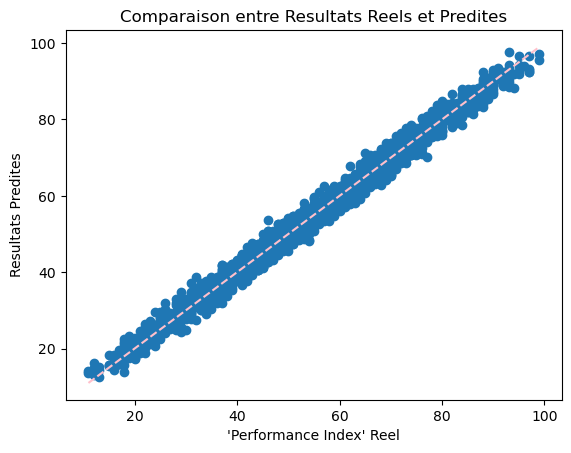

In [272]:
#8 visualization du model; predictions et resultats reel
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='pink', linestyle='--', label="Ligne parfaite (y=x)")
plt.title('Comparaison entre Resultats Reels et Predites')
plt.xlabel('\'Performance Index\' Reel')
plt.ylabel('Resultats Predites')
plt.show()

*ligne en rose: représente le scénario où le resultat prévus correspond parfaitement aux resultats réels. <br> Points de dispersion: Chaque point represente une prédiction. Les points proches de la ligne indiquent des prédictions exactes.*

*fin du tp 4 - theorie et traitement de l'information*